In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt



In [14]:
## Compute PD

for i in range(2,3):
    file=open('../Gudhi_Persistence/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    birth=[]
    death=[]
    for j in range(0,len(data1)//2):
        birth.append(abs(float(data1[2*j])))
    birthh=np.array(birth)
    for k in range(0,len(data1)//2):
        death.append(abs(float(data1[2*k+1])))
    deathh=np.array(death)
    plt.figure()
    fig, ax = plt.subplots()
    ax.plot(birthh,deathh,'bo',markersize=2)
    ax.plot(np.arange(0.0,255.0,0.5), np.arange(0.0,255.0,0.5),'r--')
    ax.vlines(x=60, ymin=0, ymax=80,color='k', linestyle='--')
    ax.vlines(x=80, ymin=0, ymax=80,color='k', linestyle='--')
    #plt.axhline(y=80.0, color='k', linestyle='--')
    ax.hlines(y=60, xmin=60, xmax=150, color='k', linestyle='--')
    ax.hlines(y=80, xmin=60, xmax=150, color='k', linestyle='--')
    plt.axis('scaled')
    plt.axis([0, 150 , 0, 150])
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('time2_th_60-80')
    plt.savefig('../thresholding/show_to_group/60-80/', dpi=800)
    plt.close()
    plt.show()


<Figure size 432x288 with 0 Axes>

In [ ]:
##for thresholding a PD 


import numpy as np
import matplotlib
from matplotlib import pyplot as plt

for i in range(2,2872):
    file=open('../Gudhi_Persistence/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    birth=[]
    death=[]
    for j in range(0,len(data1)//2):
        birth.append(abs(float(data1[2*j])))
    birthh=np.array(birth)
    for k in range(0,len(data1)//2):
        death.append(abs(float(data1[2*k+1])))
    deathh=np.array(death)
    th=[]
    for i in range(80,81):
        th.append(i)
    thre=np.array(th)
    #print(thre)
    for i in range(0,len(thre)):
        plt.figure()
        fig, ax = plt.subplots()
        ax.plot(birthh,deathh,'bo',markersize=2)
        ax.plot(np.arange(0.0,255.0,0.5), np.arange(0.0,255.0,0.5),'r--')
        ax.vlines(x=thre[i], ymin=0, ymax=thre[i],color='k', linestyle='--')
        #plt.axhline(y=80.0, color='k', linestyle='--')
        ax.hlines(y=thre[i], xmin=thre[i], xmax=150, color='k', linestyle='--')
        plt.axis('scaled')
        plt.axis([0, 150 , 0, 150])
        plt.xlabel('Birth')
        plt.ylabel('Death')
        plt.title('time2_th'+str(thre[i]))
        plt.savefig('../thresholding/'+str(thre[i]), dpi=800)
        plt.close()
        plt.show()


[416.1699 425.3971 408.8444 ... 200.6077 193.9055 242.8324]


Text(0.5, 1.0, 'TP')

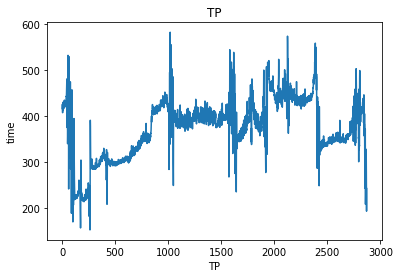

In [3]:
## Total Persistence
Tp=[]
for i in range(2,2872):
    file=open('../Gudhi_Persistence/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    birth=[]
    death=[]
    for j in range(0,len(data1)//2):
        birth.append(abs(float(data1[2*j])))
    birthh=np.array(birth)
    for k in range(0,len(data1)//2):
        death.append(abs(float(data1[2*k+1])))
    deathh=np.array(death)
    diff=sum(birthh-deathh)
    Tp.append(diff)
tp=np.array(Tp)
print(tp)
t=range(2,2872)
plt.figure()
plt.plot(t,tp)
plt.xlabel('TP')
plt.ylabel('time')
plt.title('TP')

In [14]:
velo_int= np.loadtxt('../IntruderTime_IntruderVelocity.txt')
velocity=[]
for i in range(1,2872):
    velocity.append(velo_int[i,2])
vel_Data=np.array(velocity)
print((vel_Data))

fig = plt.figure(figsize=(20,5))    
ax1 = fig.gca()
color = 'tab:red'
ax1.set_xlabel('frame')
ax1.set_ylabel('TP_0', color=color)
ax1.plot(tp, color=color, label='total_persistence')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('vel_Data', color=color)  # we already handled the x-label with ax1
ax2.plot(vel_Data, color=color, label='Vel_intruder')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('total persistence vs velocity')
plt.legend(loc='\n'+'Vel_intruder')
#plt.savefig('..\thresholding\Next_Thrusday\Exterimental\' + 'total_persistence_vs_Int_vel.png', dpi=800)
plt.savefig('TP vs Velocity' )
plt.close(fig)
plt.show()

[-0.037405   -0.028616   -0.00089959 ...  0.78661     0.72797
  0.5148    ]


C:\Users\ritup\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Unrecognized location '\nVel_intruder'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


In [17]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
for i in range(2,3):
    file=open('../Gudhi_Persistence/' + str(i)+'.txt','r')
    file2=file.read()
    file3=file2.replace('(0,','')
    file4=file3.replace('))','')
    file5=file4.replace(' (','')
    file6=file5.replace('[','')
    file7=file6.replace(']','')
    file8=file7.replace(' ','')
    file9=file8.replace('inf','0')
    data=file9.split(',')
    data1=np.asarray(data)
    birth=[]
    death=[]
    for j in range(0,len(data1)//2):
        birth.append(abs(float(data1[2*j])))
    birthh=np.array(birth)
    for k in range(0,len(data1)//2):
        death.append(abs(float(data1[2*k+1])))
    deathh=np.array(deathh)
    

In [23]:
betti_arr=[]
count=0
th=80
for s in range(0,len(birthh)//2):
    if(birthh[s]>th and deathh[s]<th):
        count=count+1
print(count)
#print(((betti_num)))

4
